# GO EMOTIONS PROJECT 
# Vie Romain


In [ ]:
%matplotlib inline
#!pip install tensorflow
import json
import tensorflow as tf
import tensorflow_datasets as tfds
import pandas as pd 
import numpy as np
from sklearn import preprocessing
from sklearn.decomposition import PCA
from mpl_toolkits.mplot3d import Axes3D

from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

# Hyperparameters

In [ ]:
vocab_size = 10000
embedding_dim = 16
max_length = 100
trunc_type='post'
padding_type='post'
oov_tok = "<OOV>"
training_size = 20000

# Load data

In [ ]:
data, info = tfds.load("goemotions", with_info=True, split='train')
print(info)

tfds.core.DatasetInfo(
    name='goemotions',
    full_name='goemotions/0.1.0',
    description="""
    The GoEmotions dataset contains 58k carefully curated Reddit comments labeled
    for 27 emotion categories or Neutral. The emotion categories are admiration,
    amusement, anger, annoyance, approval, caring, confusion, curiosity, desire,
    disappointment, disapproval, disgust, embarrassment, excitement, fear,
    gratitude, grief, joy, love, nervousness, optimism, pride, realization, relief,
    remorse, sadness, surprise.
    """,
    homepage='https://github.com/google-research/google-research/tree/master/goemotions',
    data_path='~/tensorflow_datasets/goemotions/0.1.0',
    file_format=tfrecord,
    download_size=4.19 MiB,
    dataset_size=32.25 MiB,
    features=FeaturesDict({
        'admiration': tf.bool,
        'amusement': tf.bool,
        'anger': tf.bool,
        'annoyance': tf.bool,
        'approval': tf.bool,
        'caring': tf.bool,
        'comment_text': Tex

In [ ]:
train = !wget -P data/full_dataset/ https://storage.googleapis.com/gresearch/goemotions/data/full_dataset/goemotions_1.csv
test = !wget -P data/full_dataset/ https://storage.googleapis.com/gresearch/goemotions/data/full_dataset/goemotions_2.csv
evaluate = !wget -P data/full_dataset/ https://storage.googleapis.com/gresearch/goemotions/data/full_dataset/goemotions_3.csv

In [ ]:
train = pd.read_csv("https://storage.googleapis.com/gresearch/goemotions/data/full_dataset/goemotions_1.csv")
test = pd.read_csv("https://storage.googleapis.com/gresearch/goemotions/data/full_dataset/goemotions_2.csv")
evaluate = pd.read_csv("https://storage.googleapis.com/gresearch/goemotions/data/full_dataset/goemotions_3.csv")

In [ ]:
train.head(5)
test.head()
evaluate.head()

,text,id,author,subreddit,link_id,parent_id,created_utc,rater_id,example_very_unclear,admiration,...,love,nervousness,optimism,pride,realization,relief,remorse,sadness,surprise,neutral
0,Worst ending ever! I won't spoil it but this o...,eee021b,tribaltrak,movies,t3_agxbsx,t3_agxbsx,1.547847e+09,42,False,0,...,0,0,0,0,0,0,0,0,0,0
1,Happy cake day u/sneakpeekbot!,ed00f1z,InfernicFuse,danganronpa,t3_abajdo,t1_eczoocj,1.546328e+09,24,False,0,...,0,0,0,0,0,0,0,0,0,0
2,Was he rejected because of his methodology or ...,ee1h5v1,OssToYouGoodSir,medicine,t3_aflo7s,t1_ee0v0vv,1.547464e+09,77,False,0,...,0,0,0,0,0,0,0,0,0,0
3,"thanks, I agree",eemi935,PMOFreeForever,NoFap,t3_ai7h09,t1_eelu54r,1.548088e+09,46,False,0,...,0,0,0,0,0,0,0,0,0,0
4,Why would you doubt it dumbass?,eduun99,ugliestman1,Tinder,t3_aejwne,t1_edumeal,1.547255e+09,36,False,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
# clean the dataset

train = train.drop(['id','author','subreddit', 'link_id', 'parent_id', 'created_utc','rater_id','example_very_unclear'], axis = 1)
test =test.drop(['id','author','subreddit', 'link_id', 'parent_id', 'created_utc','rater_id','example_very_unclear'], axis = 1)
evaluate =evaluate.drop(['id','author','subreddit', 'link_id', 'parent_id', 'created_utc','rater_id','example_very_unclear'], axis = 1)


In [ ]:
# train
labels_train = train.drop(['text'], axis = 1)
labels_train = np.array(labels_train)
# validation
labels_val = evaluate.drop(['text'], axis = 1)
labels_val = np.array(labels_val)
# test
#test['text'] = pd.Series(test['text'])
labels_test = test.drop(['text'], axis = 1)
labels_test = np.array(labels_test)

In [ ]:
# tokenize : breaking the sentences into word parts
# create an element token
tokenizer = Tokenizer(num_words = vocab_size, oov_token=oov_tok)
# fit it on train data
tokenizer.fit_on_texts(train["text"])

# tokenize the text with the same size
sequences_training_words = tokenizer.texts_to_sequences(train["text"])
padded_train = pad_sequences(sequences_training_words,maxlen=max_length, truncating=trunc_type)
padded_train = np.array(padded_train)

# validation
sequences_val_words = tokenizer.texts_to_sequences(evaluate["text"])
padded_val = pad_sequences(sequences_val_words,maxlen=max_length, truncating=trunc_type)
padded_val = np.array(padded_val)

# test
sequences_testing_words = tokenizer.texts_to_sequences(test["text"])
padded_test = pad_sequences(sequences_testing_words,maxlen=max_length, truncating=trunc_type)
padded_test = np.array(padded_test)

#Base Model Training

In [ ]:
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(vocab_size, embedding_dim, input_length=max_length),
    tf.keras.layers.GlobalAveragePooling1D(),
    tf.keras.layers.Dense(12, activation='softmax'),
    tf.keras.layers.Dense(28, activation='softmax')
    
])
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

In [ ]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_3 (Embedding)     (None, 100, 16)           160000    
                                                                 
 global_average_pooling1d_1   (None, 16)               0         
 (GlobalAveragePooling1D)                                        
                                                                 
 dense_6 (Dense)             (None, 12)                204       
                                                                 
 dense_7 (Dense)             (None, 28)                364       
                                                                 
Total params: 160,568
Trainable params: 160,568
Non-trainable params: 0
_________________________________________________________________


In [ ]:
num_epochs = 1
history = model.fit(padded_train, labels_train, epochs=50, validation_data=(padded_val, labels_val), verbose=2)

Epoch 1/50
2188/2188 - 13s - loss: 0.2705 - accuracy: 0.2113 - val_loss: 0.1673 - val_accuracy: 0.2614 - 13s/epoch - 6ms/step
Epoch 2/50
2188/2188 - 14s - loss: 0.1603 - accuracy: 0.2632 - val_loss: 0.1577 - val_accuracy: 0.2614 - 14s/epoch - 6ms/step
Epoch 3/50
2188/2188 - 13s - loss: 0.1572 - accuracy: 0.2632 - val_loss: 0.1570 - val_accuracy: 0.2614 - 13s/epoch - 6ms/step
Epoch 4/50
2188/2188 - 13s - loss: 0.1569 - accuracy: 0.2632 - val_loss: 0.1570 - val_accuracy: 0.2614 - 13s/epoch - 6ms/step
Epoch 5/50
2188/2188 - 13s - loss: 0.1569 - accuracy: 0.2632 - val_loss: 0.1570 - val_accuracy: 0.2614 - 13s/epoch - 6ms/step
Epoch 6/50
2188/2188 - 10s - loss: 0.1568 - accuracy: 0.2632 - val_loss: 0.1566 - val_accuracy: 0.2614 - 10s/epoch - 5ms/step
Epoch 7/50
2188/2188 - 11s - loss: 0.1559 - accuracy: 0.2638 - val_loss: 0.1551 - val_accuracy: 0.2634 - 11s/epoch - 5ms/step
Epoch 8/50
2188/2188 - 10s - loss: 0.1536 - accuracy: 0.2735 - val_loss: 0.1527 - val_accuracy: 0.2773 - 10s/epoch - 5

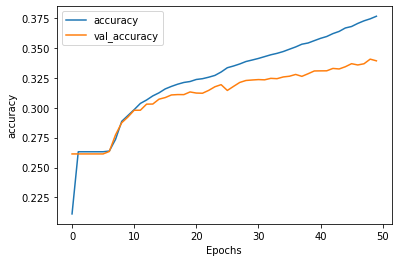

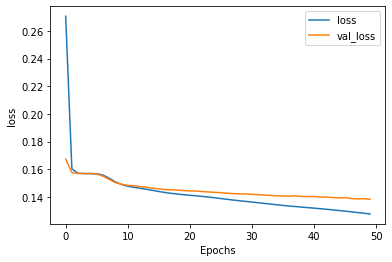

In [ ]:
import matplotlib.pyplot as plt

def plot_graphs(history, string):
  plt.plot(history.history[string])
  plt.plot(history.history['val_'+string])
  plt.xlabel("Epochs")
  plt.ylabel(string)
  plt.legend([string, 'val_'+string])
  plt.show()
  
plot_graphs(history, "accuracy")
plot_graphs(history, "loss")

In [ ]:
sentence = ["granny starting to fear spiders in the garden might be real", "game of thrones season finale showing this sunday night"]
sequences = tokenizer.texts_to_sequences(sentence)
padded = pad_sequences(sequences, maxlen=max_length, padding=padding_type, truncating=trunc_type)
prediction = model.predict(padded)

1/1 [==============================] - 0s 69ms/step


In [ ]:
#history.history

print("Evaluate model on test data")
results = model.evaluate(padded_test, labels_test, batch_size=128)
print("test loss, test acc:", results)

Evaluate model on test data
547/547 [==============================] - 1s 2ms/step - loss: 0.1691 - accuracy: 0.2608
test loss, test acc: [0.16909052431583405, 0.26084285974502563]


#Let's try to normalize the sequences


In [ ]:
padded_train

array([[   0,    0,    0, ...,    9,  135,  509],
       [   0,    0,    0, ..., 1845,   12, 7382],
       [   0,    0,    0, ...,   98,  196, 3749],
       ...,
       [   0,    0,    0, ..., 5938,   26, 7729],
       [   0,    0,    0, ...,   10,  112,   19],
       [   0,    0,    0, ...,  111, 1875,  654]], dtype=int32)

In [ ]:
norm_padded_train = preprocessing.normalize(padded_train)
padded_train


array([[   0,    0,    0, ...,    9,  135,  509],
       [   0,    0,    0, ..., 1845,   12, 7382],
       [   0,    0,    0, ...,   98,  196, 3749],
       ...,
       [   0,    0,    0, ..., 5938,   26, 7729],
       [   0,    0,    0, ...,   10,  112,   19],
       [   0,    0,    0, ...,  111, 1875,  654]], dtype=int32)

In [ ]:
# labels are already standardized
norm_padded_train = preprocessing.normalize(padded_train)
norm_padded_val = preprocessing.normalize(padded_val)
norm_padded_test = preprocessing.normalize(padded_test)

In [ ]:
history = model.fit(norm_padded_train, labels_train, epochs=2, validation_data=(norm_padded_val, labels_val), verbose=2)

Epoch 1/2
2188/2188 - 11s - loss: 0.1609 - accuracy: 0.2632 - val_loss: 0.1579 - val_accuracy: 0.2614 - 11s/epoch - 5ms/step
Epoch 2/2
2188/2188 - 12s - loss: 0.1572 - accuracy: 0.2632 - val_loss: 0.1571 - val_accuracy: 0.2614 - 12s/epoch - 5ms/step


In [ ]:
print("Evaluate model on test data")
results = model.evaluate(padded_test, labels_test, batch_size=128)
print("test loss, test acc:", results)

Evaluate model on test data
547/547 [==============================] - 1s 2ms/step - loss: 0.1575 - accuracy: 0.2608
test loss, test acc: [0.1574648916721344, 0.26084285974502563]


It was expected to win in accuracy with normalization, however we loose about 3 % of accuracy.

# LSTM Layer


Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_2 (Embedding)     (None, 100, 16)           160000    
                                                                 
 dense_4 (Dense)             (None, 100, 10)           170       
                                                                 
 lstm_1 (LSTM)               (None, 20)                2480      
                                                                 
 dense_5 (Dense)             (None, 28)                588       
                                                                 
Total params: 163,238
Trainable params: 163,238
Non-trainable params: 0
_________________________________________________________________
Epoch 1/50
2188/2188 - 23s - loss: 0.1709 - accuracy: 0.2515 - val_loss: 0.1571 - val_accuracy: 0.2614 - 23s/epoch - 11ms/step
Epoch 2/50
2188/2188 - 21s - loss: 0.1570 - accuracy:

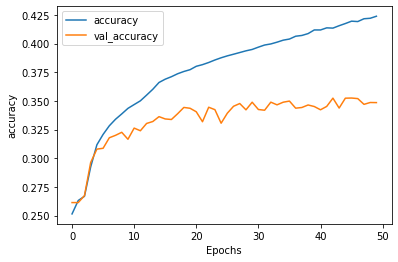

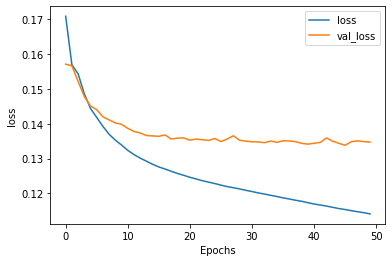

In [ ]:
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(vocab_size, embedding_dim, input_length=max_length),
    #tf.keras.layers.GlobalAveragePooling1D(),
    tf.keras.layers.Dense(10, activation='softmax'),
    tf.keras.layers.LSTM(20),
    tf.keras.layers.Dense(28, activation='softmax')
    
])
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])
model.summary()

history = model.fit(padded_train, labels_train, epochs=50, validation_data=(padded_val, labels_val), verbose=2)

plot_graphs(history, "accuracy")
plot_graphs(history, "loss")

# Tez Pre-trained model

In [2]:
%config Completer.use_jedi=False
%matplotlib inline
%pip install datasets
%pip install tez
%pip install transformers

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 451 kB 12.0 MB/s 
     |████████████████████████████████| 132 kB 36.4 MB/s 
     |████████████████████████████████| 212 kB 36.7 MB/s 
     |████████████████████████████████| 182 kB 43.5 MB/s 
     |████████████████████████████████| 127 kB 62.3 MB/s 
  Attempting uninstall: urllib3
    Found existing installation: urllib3 1.24.3
    Uninstalling urllib3-1.24.3:
      Successfully uninstalled urllib3-1.24.3
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 191 kB 21.3 MB/s 
     |████████████████████████████████| 58 kB 7.2 MB/s 
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 5.8 MB 14.5 MB/s 
     |████████████████████████████████| 7.6 MB 62.4 MB/s 


In [3]:
_CLASS_NAMES = [
    "admiration",
    "amusement",
    "anger",
    "annoyance",
    "approval",
    "caring",
    "confusion",
    "curiosity",
    "desire",
    "disappointment",
    "disapproval",
    "disgust",
    "embarrassment",
    "excitement",
    "fear",
    "gratitude",
    "grief",
    "joy",
    "love",
    "nervousness",
    "optimism",
    "pride",
    "realization",
    "relief",
    "remorse",
    "sadness",
    "surprise",
    "neutral",
]

mapping = dict(zip(range(len(_CLASS_NAMES)),_CLASS_NAMES))

In [4]:
from datasets import load_dataset

import pandas as pd
pd.set_option('display.max_colwidth', -1)
import numpy as np

from tqdm.notebook import tqdm
from matplotlib import pyplot as plt

from torch.utils.data import DataLoader

import tez
import torch
import torch.nn as nn
import transformers
from sklearn import metrics, model_selection, preprocessing
from transformers import AdamW, get_linear_schedule_with_warmup

<ipython-input-4-b0777a05ef0f>:4: FutureWarning: Passing a negative integer is deprecated in version 1.0 and will not be supported in future version. Instead, use None to not limit the column width.
  pd.set_option('display.max_colwidth', -1)


In [5]:
go_emotions = load_dataset("go_emotions")

data = go_emotions.data

train = go_emotions.data["train"].to_pandas()
valid = go_emotions.data["validation"].to_pandas()
test = go_emotions.data["test"].to_pandas()


n_labels = len(mapping)

def one_hot_labels(df):
    dict_labels = []
    for i in tqdm(range(len(df)), leave=False):
        d = dict(zip(range(n_labels), [0]*n_labels))
        labels = df.loc[i]["labels"]
        for label in labels:
            d[label] = 1
        dict_labels.append(d)
    df_labels = pd.DataFrame(dict_labels)
    return df_labels

train_oh_labels = one_hot_labels(train)
valid_oh_labels = one_hot_labels(valid)
test_oh_labels = one_hot_labels(test)


train = pd.concat([train, train_oh_labels], axis=1)
valid = pd.concat([valid, valid_oh_labels], axis=1)
test = pd.concat([test, test_oh_labels], axis=1)




Generating train split:   0%|          | 0/43410 [00:00<?, ? examples/s]

Generating validation split:   0%|          | 0/5426 [00:00<?, ? examples/s]

Generating test split:   0%|          | 0/5427 [00:00<?, ? examples/s]

Dataset go_emotions downloaded and prepared to /root/.cache/huggingface/datasets/go_emotions/simplified/0.0.0/2637cfdd4e64d30249c3ed2150fa2b9d279766bfcd6a809b9f085c61a90d776d. Subsequent calls will reuse this data.


  0%|          | 0/3 [00:00<?, ?it/s]

  0%|          | 0/43410 [00:00<?, ?it/s]

  0%|          | 0/5426 [00:00<?, ?it/s]

  0%|          | 0/5427 [00:00<?, ?it/s]

In [6]:
class GoEmotionDataset():
    def __init__(self, texts, targets):
        self.texts = texts
        self.targets = targets
        self.tokenizer = transformers.SqueezeBertTokenizer.from_pretrained(
            "squeezebert/squeezebert-uncased", do_lower_case=True
        )
        self.max_len = 35
        
    def __len__(self):
        return len(self.texts)

    
    def __getitem__(self, index):
        target = self.targets[index]
        text = self.texts[index]
        
        inputs = self.tokenizer.encode_plus(text,
                                            None,
                                            add_special_tokens=True,
                                            max_length=self.max_len,
                                            padding="max_length",
                                            truncation=True)
        
        ids = inputs["input_ids"]
        mask = inputs["attention_mask"]

        return {
            "ids": torch.tensor(ids, dtype=torch.long),
            "mask": torch.tensor(mask, dtype=torch.long),
            "targets": torch.tensor(self.targets[index], dtype=torch.long),
        }

In [7]:
class EmotionClassifier(tez.Model):
    def __init__(self, num_train_steps, num_classes):
        super().__init__()
        self.bert = transformers.SqueezeBertModel.from_pretrained("squeezebert/squeezebert-uncased")
        self.bert_drop = nn.Dropout(0.3)
        self.out = nn.Linear(768, num_classes)
        self.num_train_steps = num_train_steps
        self.step_scheduler_after = "batch"
    
    def fetch_optimizer(self):
        param_optimizer = list(self.named_parameters())
        no_decay = ["bias", "LayerNorm.bias"]
        optimizer_parameters = [
            {
                "params": [
                    p for n, p in param_optimizer if not any(nd in n for nd in no_decay)
                ],
                "weight_decay": 0.001,
            },
            {
                "params": [
                    p for n, p in param_optimizer if any(nd in n for nd in no_decay)
                ],
                "weight_decay": 0.0,
            },
        ]
        opt = AdamW(optimizer_parameters, lr=3e-5)
        return opt

    
    def fetch_scheduler(self):
        sch = get_linear_schedule_with_warmup(
            self.optimizer, num_warmup_steps=0, num_training_steps=self.num_train_steps
        )
        return sch
    
    def loss(self, outputs, targets):
        if targets is None:
            return None
        return nn.BCEWithLogitsLoss()(outputs, targets.float())
    
    
    def monitor_metrics(self, outputs, targets):
        if targets is None:
            return {}
        
        outputs = torch.sigmoid(outputs)
        outputs = outputs.cpu().detach().numpy()
        targets = targets.cpu().detach().numpy()
        
        fpr_micro, tpr_micro, _ = metrics.roc_curve(targets.ravel(), outputs.ravel())
        auc_micro = metrics.auc(fpr_micro, tpr_micro)
        return {"auc": auc_micro}
 
    
    def forward(self, ids, mask, targets=None):
        o_2 = self.bert(ids, attention_mask=mask)["pooler_output"]
        b_o = self.bert_drop(o_2)
        output = self.out(b_o)
        loss = self.loss(output, targets)
        acc = self.monitor_metrics(output, targets)
        return output, loss, acc

In [8]:
train_dataset = GoEmotionDataset(train.text.tolist(), train[range(n_labels)].values.tolist())
valid_dataset = GoEmotionDataset(valid.text.tolist(), valid[range(n_labels)].values.tolist())

Downloading:   0%|          | 0.00/232k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/500 [00:00<?, ?B/s]

In [9]:
n_train_steps = int(len(train) / 32 * 10)
model = EmotionClassifier(n_train_steps, n_labels)

es = tez.callbacks.EarlyStopping(monitor="valid_loss", model_path="export/model.bin")


model.fit(train_dataset,
          valid_dataset, 
          train_bs=64,
          epochs=3, 
          callbacks=[es], 
          fp16=True, 
          n_jobs=10)

Downloading:   0%|          | 0.00/103M [00:00<?, ?B/s]

Some weights of the model checkpoint at squeezebert/squeezebert-uncased were not used when initializing SqueezeBertModel: ['cls.predictions.transform.LayerNorm.weight', 'cls.predictions.transform.dense.bias', 'cls.predictions.bias', 'cls.predictions.transform.dense.weight', 'cls.predictions.transform.LayerNorm.bias', 'cls.seq_relationship.bias', 'cls.seq_relationship.weight', 'cls.predictions.decoder.weight']
- This IS expected if you are initializing SqueezeBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing SqueezeBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


NOTE: This is old Model class and is deprecated. It will no longer be maintained! Please use version > 0.5.1. Its much better and supports multi-gpu training too!


/usr/local/lib/python3.8/dist-packages/transformers/optimization.py:306: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  warnings.warn(
100%|██████████| 340/340 [00:13<00:00, 25.70it/s, auc=0.854, loss=0.131, stage=valid]


AttributeError: ignored

In [14]:
outputs = []

with torch.no_grad():
    for i, batch in tqdm(enumerate(dataloader), total=len(dataloader)):
        output, loss, acc = model.forward(batch["ids"].to("cuda"), 
                                          batch["mask"].to("cuda"), 
                                          #batch["token_type_ids"].to("cuda"),
                                          batch["targets"].to("cuda")
                                         )
        outputs.append(output)

  0%|          | 0/85 [00:00<?, ?it/s]

In [15]:
test_dataset = GoEmotionDataset(test.text.tolist(), test[range(n_labels)].values.tolist())
dataloader = DataLoader(test_dataset, batch_size=64, shuffle=False, drop_last=False)

In [17]:
outputs = torch.cat(outputs)
outputs = torch.sigmoid(outputs)
outputs = outputs.cpu().detach().numpy()

Average accuracy is  0.7168848855205867


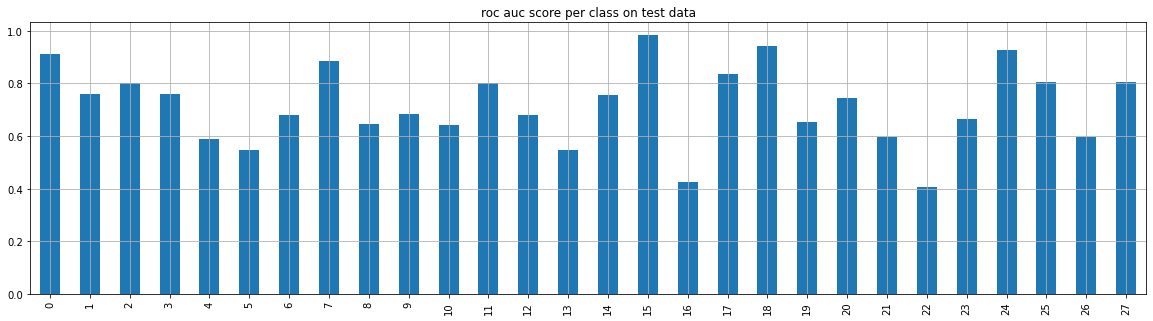

In [18]:
roc_metrics = []

for i in range(n_labels):
    roc = metrics.roc_auc_score(test[i].values, outputs[:, i])
    roc_metrics.append(roc)

s = pd.Series(roc_metrics, index=range(n_labels))

s.plot(kind="bar", figsize=(20, 5), title="roc auc score per class on test data", grid=True)

import statistics

print("Average accuracy is ",statistics.mean(roc_metrics))